# Part 1

In [3]:
import pandas as pd

"""
inst: Institution code
time: Survival time in days
status: censoring status 1=censored, 2=dead
age: Age in years
sex: Male=1 Female=2
ph.ecog: ECOG performance score as rated by the physician. 0=asymptomatic, 1= symptomatic but completely ambulatory, 2= in bed <50% of the day, 3= in bed > 50%

of the day but not bedbound, 4 = bedbound

ph.karno: Karnofsky performance score (bad=0-good=100) rated by physician
pat.karno: Karnofsky performance score as rated by patient
meal.cal: Calories consumed at meals
wt.loss: Weight loss in last six months
"""

dataset = pd.read_csv("lung.csv")
dataset.tail()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
223,1.0,188,1,77,1,1.0,80.0,60.0,NaN,3.0
224,13.0,191,1,39,1,0.0,90.0,90.0,2350.0,-5.0
225,32.0,105,1,75,2,2.0,60.0,70.0,1025.0,5.0
226,6.0,174,1,66,1,1.0,90.0,100.0,1075.0,1.0
227,22.0,177,1,58,2,1.0,80.0,90.0,1060.0,0.0


In [4]:
# Data transformation
dataset.loc[dataset["status"]==1, "status"] = 0
dataset.loc[dataset["status"]==2, "status"] = 1

dataset.tail()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
223,1.0,188,0,77,1,1.0,80.0,60.0,NaN,3.0
224,13.0,191,0,39,1,0.0,90.0,90.0,2350.0,-5.0
225,32.0,105,0,75,2,2.0,60.0,70.0,1025.0,5.0
226,6.0,174,0,66,1,1.0,90.0,100.0,1075.0,1.0
227,22.0,177,0,58,2,1.0,80.0,90.0,1060.0,0.0


## Kaplan-Meier Estimator (All data)

In [5]:
!pip install lifelines --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.8 MB/s eta 0:00:00


In [6]:
from lifelines import KaplanMeierFitter as kmf

model = kmf()
model.fit(durations=dataset['time'],
          event_observed=dataset['status'])

model.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [7]:
km_table = model.event_table
day_5 = km_table.iloc[1, :]
sur_5 = 1 * (1 - day_5['observed']/day_5['at_risk'])
print(f"surv. rate in day=5 is {sur_5:.3f}")

day_11 = km_table.iloc[2, :]
sur_11 = sur_5 * (1 - day_11['observed']/day_11['at_risk'])
print(f"surv. rate in day=11 is {sur_11:.3f}")

surv. rate in day=5 is 0.996
surv. rate in day=11 is 0.982


### Ploting

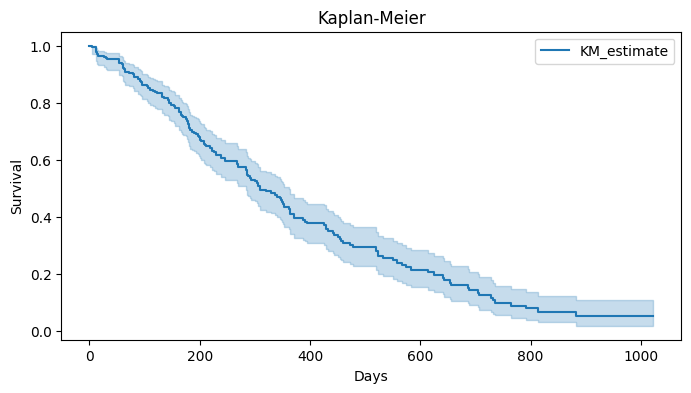

In [8]:
import matplotlib.pyplot as plt

model.plot(figsize=(8, 4))
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

plt.show()

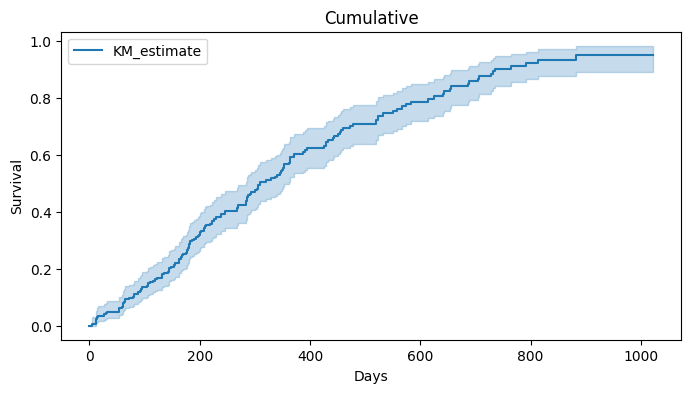

In [9]:
import matplotlib.pyplot as plt

model.plot_cumulative_density(figsize=(8, 4))
plt.title("Cumulative")
plt.xlabel("Days")
plt.ylabel("Survival")

plt.show()

## Kaplan-Meier Estimator (Men and Women)

In [10]:
men_data = dataset[dataset['sex']==1]  # men_data = dataset.query("sex == 1")
women_data = dataset[dataset['sex']==2]

In [11]:
from lifelines import KaplanMeierFitter as kmf

men_model = kmf().fit(durations=men_data['time'],
                    event_observed=men_data['status'])
women_model = kmf().fit(durations=women_data['time'],
                    event_observed=women_data['status'])

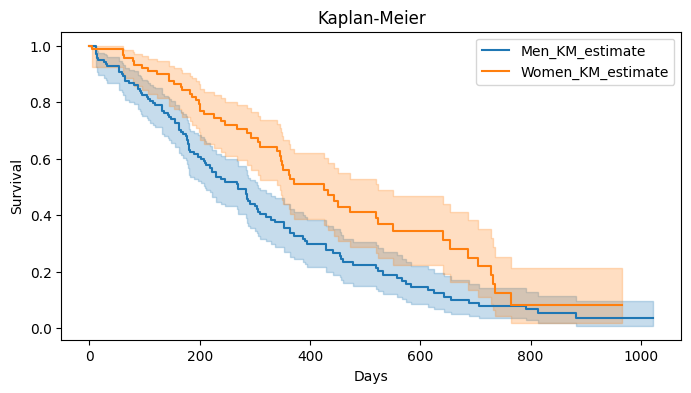

In [12]:
import matplotlib.pyplot as plt

men_model.plot(figsize=(8, 4), label="Men_KM_estimate")
women_model.plot(figsize=(8,4), label="Women_KM_estimate")
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

plt.legend()
plt.show()

## Log Rank Test

In [13]:
from lifelines.statistics import logrank_test

logrank_test(durations_A=men_data['time'],
             durations_B=women_data['time'],
             event_observed_A=men_data['status'],
             event_observed_B=women_data['status'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

# Part 2

In [29]:
import pandas as pd

"""
A data frame with 900 observations on the following 6 variables.
Opening: the amount of clearance around the mounting pad (3 levels)
Solder: the amount of solder (Thick or Thin)
Mask: type and thickness of the material used for the solder mask (A1.5, A3, A6, B3, B6)
PadType: the geometry and size of the mounting pad (10 levels)
Panel: each board was divided into 3 panels
skips:  the number of skips
"""

solder_data = pd.read_csv("solder.csv")
solder_data.tail()

,Opening,Solder,Mask,PadType,Panel,skips
895,S,Thin,B6,W9,2,21
896,S,Thin,B6,W9,3,15
897,S,Thin,B6,L9,1,11
898,S,Thin,B6,L9,2,33
899,S,Thin,B6,L9,3,15


In [30]:
import numpy as np

solder_data["Solder"] = np.where(solder_data["Solder"]=="Thin", 1, 0)
solder_data.head()

,Opening,Solder,Mask,PadType,Panel,skips
0,L,0,A1.5,W4,1,0
1,L,0,A1.5,W4,2,0
2,L,0,A1.5,W4,3,0
3,L,0,A1.5,D4,1,0
4,L,0,A1.5,D4,2,0


## Kaplan-Meier

In [31]:
#KME
from lifelines import KaplanMeierFitter as kmf

model = kmf().fit(durations=solder_data["skips"],
                       event_observed=solder_data["Solder"])

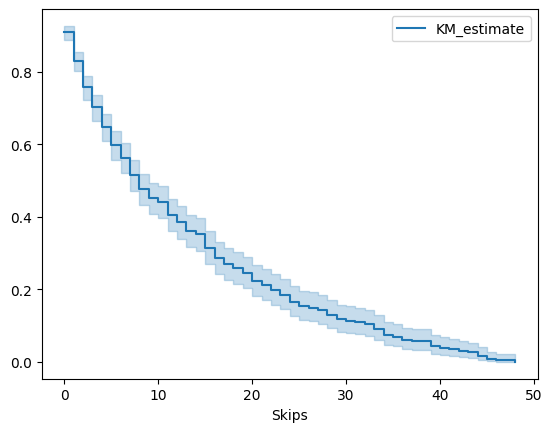

In [32]:
#Plotting
from matplotlib import pyplot as plt

model.plot()

plt.xlabel("Skips")
plt.show()

## Log Rank Test

In [34]:
from lifelines import KaplanMeierFitter as kmp

models = []
for i in [1, 2, 3]:
    temp_data = solder_data.query(f"Panel == {i}")
    temp_model = kmp().fit(durations=temp_data["skips"], event_observed=temp_data["Solder"])
    models.append(temp_model)

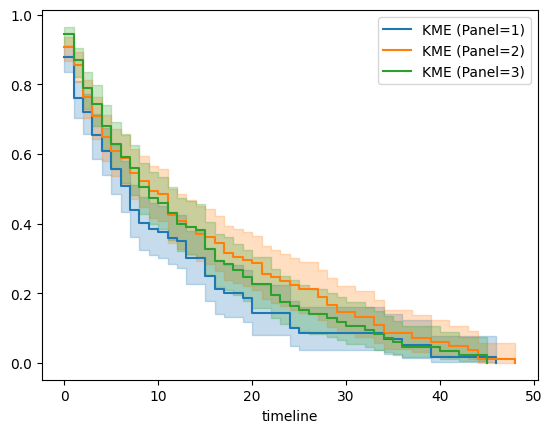

In [39]:
for i in range(3):
    models[i].plot(label=f"KME (Panel={i+1})")

plt.legend()
plt.show()

In [33]:
from lifelines.statistics import multivariate_logrank_test

multivariate_logrank_test(event_durations=solder_data["skips"],
                          groups=solder_data["Panel"],
                          event_observed=solder_data["Solder"])

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           6.84 0.03      4.93